In [123]:
import pyreadr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=gse7390

In [124]:
# load .rDATA
result = pyreadr.read_r('GSE7390.RData')

In [140]:
print(result.keys()) 
df = result["data"] # extract gene expression
annot = result["annot"] # extract gene information/description
annot.to_csv("annot.csv", index=False)
demo = result["demo"] # extract clinical data

print(df.shape)
print(annot.shape)
print(demo.shape)

odict_keys(['data', 'demo', 'annot'])
(198, 22283)
(22283, 10)
(198, 28)


In [133]:
df

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
VDXGUYU_4002,10.780787,8.674201,7.738589,9.285511,6.610484,8.505162,6.867181,7.168175,6.252700,5.262454,...,8.921485,9.313626,14.888195,14.369094,2.929942,5.680176,1.753631,2.223181,4.013873,1.603252
VDXGUYU_4008,11.335393,9.354759,7.763657,9.025809,4.809869,8.674612,5.097706,5.654260,9.892701,3.438981,...,8.696506,8.711194,15.011879,14.545059,2.667544,2.888221,1.767325,2.013092,5.355048,2.455589
VDXGUYU_4011,11.028074,9.053889,6.327600,9.234409,4.621973,8.406754,6.932156,6.263502,8.777121,4.738016,...,7.975107,9.370440,15.170855,14.838521,3.258987,3.464008,4.875803,0.581058,4.054644,2.021403
VDXGUYU_4014,11.847736,9.139895,7.032598,9.656416,5.589404,9.106449,7.751138,6.371654,11.993179,5.185123,...,9.130724,9.413045,15.126623,14.702279,3.865262,5.564328,3.361199,2.251075,4.760490,2.365204
VDXGUYU_4022,12.359239,9.196708,7.873428,9.174188,5.325173,10.030778,7.156790,4.057771,6.359531,6.061211,...,8.028944,8.596815,15.492080,14.936844,3.321554,5.957565,2.400875,4.915962,6.120431,2.774229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VDXRHU_5228,10.785023,10.012078,6.855161,8.987488,5.833270,8.030344,5.473191,5.683147,10.456655,4.828817,...,9.367166,9.604793,14.995815,14.772445,4.910978,3.553865,5.375497,0.929578,2.431918,3.235379
VDXRHU_5232,11.390198,9.830344,7.150656,8.766830,3.977743,8.014831,5.364158,6.170392,9.249901,5.571832,...,8.110920,8.876842,14.776088,14.450324,3.053255,2.859465,1.858311,1.906231,4.948435,2.761732
VDXRHU_5235,10.735085,8.894038,7.262618,9.064142,3.781916,9.533836,7.063272,5.451382,8.613225,4.774023,...,9.220284,9.528826,15.555733,15.466626,4.281239,5.588937,4.302067,4.468821,5.678535,3.143182
VDXRHU_5236,10.653104,8.854766,6.636791,9.283177,3.724769,9.722750,7.616948,4.402618,12.423745,5.884242,...,9.534969,10.841778,15.407131,15.166397,3.427110,3.120619,5.088536,5.682201,3.685063,1.916516


In [134]:
gene_list = annot["HUGO.gene.symbol"].tolist()
print(len(gene_list))

# housekeeping gene
housekeeping_gene = [colname for colname in list(df.columns) if str(colname).startswith('AFFX')]
print(len(count))

unknow_gene = [gene for gene in gene_list if str(gene) == 'nan']
print(len(unknow_gene))

22283
68
5419


In [127]:
# replace probes name by gene name
df_clean = df.copy()
df_clean.columns = gene_list
# remove missing value in columns name
df_clean = df_clean.loc[:, df_clean.columns.notnull()]
df_clean

,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBE1L,THRA,PTPN21,CCL5,CYP2E1,...,ACTB,ACTB,ACTB,GAPDH,GAPDH,GAPDH,STAT1,STAT1,STAT1,STAT1
VDXGUYU_4002,10.780787,8.674201,7.738589,9.285511,6.610484,8.505162,6.867181,7.168175,6.252700,5.262454,...,14.876787,14.318168,14.624740,14.986425,15.093565,15.074246,10.664389,7.241276,8.303160,8.246042
VDXGUYU_4008,11.335393,9.354759,7.763657,9.025809,4.809869,8.674612,5.097706,5.654260,9.892701,3.438981,...,14.316661,13.706087,14.203782,14.583225,14.544576,14.353156,12.419101,9.655342,10.845240,10.753146
VDXGUYU_4011,11.028074,9.053889,6.327600,9.234409,4.621973,8.406754,6.932156,6.263502,8.777121,4.738016,...,15.120107,14.101365,14.681984,14.736156,14.530003,14.258661,10.589271,7.033652,8.619232,8.433936
VDXGUYU_4014,11.847736,9.139895,7.032598,9.656416,5.589404,9.106449,7.751138,6.371654,11.993179,5.185123,...,14.918099,14.538633,14.896860,14.921864,15.014444,14.883588,12.781541,10.207268,11.450190,10.930990
VDXGUYU_4022,12.359239,9.196708,7.873428,9.174188,5.325173,10.030778,7.156790,4.057771,6.359531,6.061211,...,15.160343,14.456297,14.934535,14.352511,14.096428,13.948195,11.401921,6.894184,9.398871,8.556959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VDXRHU_5228,10.785023,10.012078,6.855161,8.987488,5.833270,8.030344,5.473191,5.683147,10.456655,4.828817,...,14.858587,13.924942,14.536470,15.532624,15.506850,15.360703,12.062116,7.645083,8.936828,9.183464
VDXRHU_5232,11.390198,9.830344,7.150656,8.766830,3.977743,8.014831,5.364158,6.170392,9.249901,5.571832,...,15.032452,14.768498,15.089477,14.944650,15.012344,14.982389,11.601189,8.149682,9.752410,9.885926
VDXRHU_5235,10.735085,8.894038,7.262618,9.064142,3.781916,9.533836,7.063272,5.451382,8.613225,4.774023,...,14.737423,13.709432,14.313515,14.481669,14.503332,14.231976,12.596178,9.442702,11.312659,10.895158
VDXRHU_5236,10.653104,8.854766,6.636791,9.283177,3.724769,9.722750,7.616948,4.402618,12.423745,5.884242,...,15.200464,14.697298,15.053906,14.913014,14.911985,14.691579,12.389494,9.420274,10.884197,10.840915


In [129]:
df_er = pd.concat([df_clean, demo['er']], axis=1)
df_er.to_csv("gene_expression_er.csv", index=False)
df_er

,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBE1L,THRA,PTPN21,CCL5,CYP2E1,...,ACTB,ACTB,GAPDH,GAPDH,GAPDH,STAT1,STAT1,STAT1,STAT1,er
VDXGUYU_4002,10.780787,8.674201,7.738589,9.285511,6.610484,8.505162,6.867181,7.168175,6.252700,5.262454,...,14.318168,14.624740,14.986425,15.093565,15.074246,10.664389,7.241276,8.303160,8.246042,0
VDXGUYU_4008,11.335393,9.354759,7.763657,9.025809,4.809869,8.674612,5.097706,5.654260,9.892701,3.438981,...,13.706087,14.203782,14.583225,14.544576,14.353156,12.419101,9.655342,10.845240,10.753146,1
VDXGUYU_4011,11.028074,9.053889,6.327600,9.234409,4.621973,8.406754,6.932156,6.263502,8.777121,4.738016,...,14.101365,14.681984,14.736156,14.530003,14.258661,10.589271,7.033652,8.619232,8.433936,0
VDXGUYU_4014,11.847736,9.139895,7.032598,9.656416,5.589404,9.106449,7.751138,6.371654,11.993179,5.185123,...,14.538633,14.896860,14.921864,15.014444,14.883588,12.781541,10.207268,11.450190,10.930990,1
VDXGUYU_4022,12.359239,9.196708,7.873428,9.174188,5.325173,10.030778,7.156790,4.057771,6.359531,6.061211,...,14.456297,14.934535,14.352511,14.096428,13.948195,11.401921,6.894184,9.398871,8.556959,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VDXRHU_5228,10.785023,10.012078,6.855161,8.987488,5.833270,8.030344,5.473191,5.683147,10.456655,4.828817,...,13.924942,14.536470,15.532624,15.506850,15.360703,12.062116,7.645083,8.936828,9.183464,0
VDXRHU_5232,11.390198,9.830344,7.150656,8.766830,3.977743,8.014831,5.364158,6.170392,9.249901,5.571832,...,14.768498,15.089477,14.944650,15.012344,14.982389,11.601189,8.149682,9.752410,9.885926,0
VDXRHU_5235,10.735085,8.894038,7.262618,9.064142,3.781916,9.533836,7.063272,5.451382,8.613225,4.774023,...,13.709432,14.313515,14.481669,14.503332,14.231976,12.596178,9.442702,11.312659,10.895158,1
VDXRHU_5236,10.653104,8.854766,6.636791,9.283177,3.724769,9.722750,7.616948,4.402618,12.423745,5.884242,...,14.697298,15.053906,14.913014,14.911985,14.691579,12.389494,9.420274,10.884197,10.840915,1


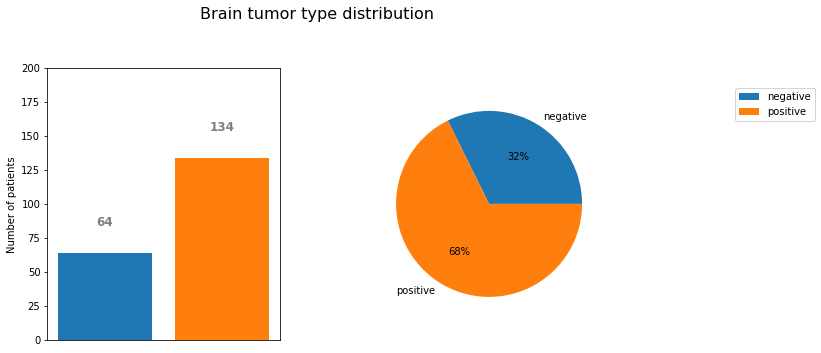

In [130]:
tumors_type = {'0': 'negative', '1': 'positive'}
labels, counts = np.unique(demo['er'], return_counts=True)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# plot frequency
ax[0].bar(labels[0], counts[0], label=tumors_type[str(labels[0])])
ax[0].bar(labels[1], counts[1], label=tumors_type[str(labels[1])])
ax[0].set_ylabel('Number of patients')
ax[0].axes.get_xaxis().set_ticks([])
ax[0].set_ylim([0, 200])

for i in ax[0].patches:
    height = i.get_height()
    ax[0].text((i.get_x() + i.get_width()/2.0), height + 20 , str(i.get_height()), ha='center',
            fontsize=12, fontweight='bold', color='grey')

#create pie chart
colors = sns.color_palette('pastel')[0:2]
ax[1].pie(counts, labels = tumors_type.values(), autopct='%.0f%%')
ax[1].legend(bbox_to_anchor=(1.9, 1), loc='upper right', borderaxespad=0)

fig.suptitle("Brain tumor type distribution", fontsize=16, y=1.05)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [131]:
from sklearn.preprocessing import StandardScaler
# standardize the data for dimensionality reduction 
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
y = demo['er']

print(x.shape)
print(y.shape)

(198, 22283)
(198,)


In [135]:
# https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
Df_pca = pd.DataFrame(data = principalComponents, columns = ['PCA1', 'PCA2'])

# Tsne
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)
#tsne_results = tsne.fit_transform(df)

Df_tsne = pd.DataFrame(data = tsne_results, columns = ['tsne-2d-one', 'tsne-2d-two'])


/home/hugo/anaconda3/envs/bioinfo3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hugo/anaconda3/envs/bioinfo3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 198 samples in 0.002s...
[t-SNE] Computed neighbors for 198 samples in 0.704s...
[t-SNE] Computed conditional probabilities for sample 198 / 198
[t-SNE] Mean sigma: 47.307432
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.097038
[t-SNE] KL divergence after 300 iterations: 1.294933


In [136]:
finalDf = pd.concat([Df_pca, Df_tsne], axis=1)
finalDf.index = df.index
finalDf['er'] = y.values
finalDf

,PCA1,PCA2,tsne-2d-one,tsne-2d-two,er
VDXGUYU_4002,16.253121,0.342009,-19.789577,-18.735022,0
VDXGUYU_4008,50.195341,29.666071,-18.593510,11.684436,1
VDXGUYU_4011,21.928234,-31.989949,-7.437154,1.664308,0
VDXGUYU_4014,37.639276,31.337365,-20.237095,5.528096,1
VDXGUYU_4022,-26.911895,39.348760,-10.341022,-30.408663,1
...,...,...,...,...,...
VDXRHU_5228,91.126554,23.703100,-15.014530,11.794381,0
VDXRHU_5232,76.569193,8.525553,26.084566,5.301138,0
VDXRHU_5235,-18.902193,19.305286,20.740980,-4.708070,1
VDXRHU_5236,10.464974,22.304425,-22.576962,5.631277,1


[<matplotlib.collections.PathCollection object at 0x7fc9e0d8bb20>, <matplotlib.collections.PathCollection object at 0x7fc9e0d8bf40>]
['negative', 'positive']


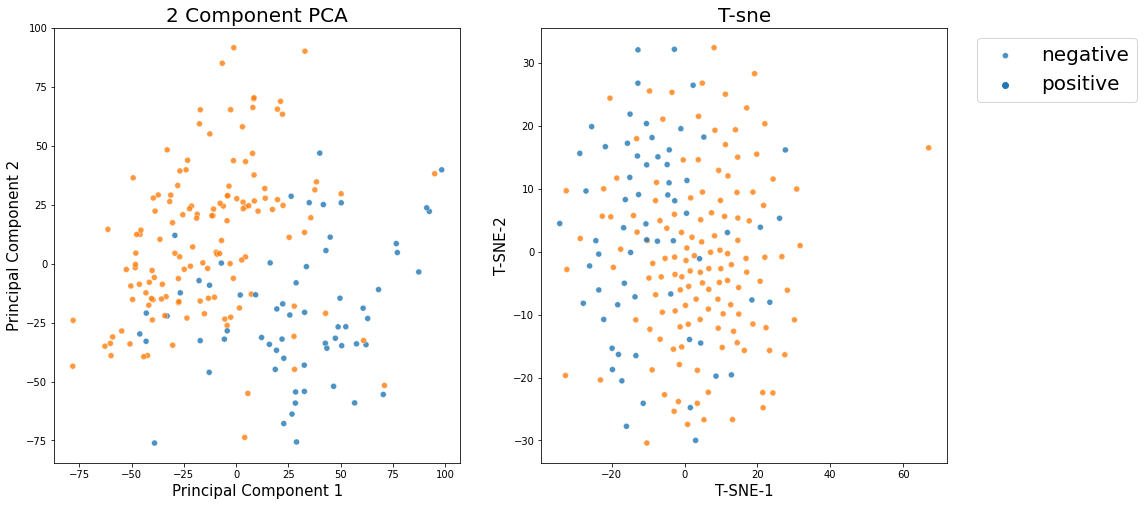

In [137]:
plt.figure(figsize=(16,8))

tumors_type = {'0': 'negative', '1': 'positive'}

color_dict = {1: '#1f77b4', 2: '#ff7f0e', 3: '#2ca02c'}
color_dict = {1: 'b', 2: 'g', 3: 'r'}

ax1 = plt.subplot(1, 2, 1)
ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 Component PCA', fontsize = 20)

sns.scatterplot(
    x="PCA1", y="PCA2",
    hue="er",
    data=finalDf,
    #palette='Set2', 
    alpha=0.8,
    legend=None,
    ax=ax1)

ax2 = plt.subplot(1, 2, 2)
ax2.set_xlabel('T-SNE-1', fontsize = 15)
ax2.set_ylabel('T-SNE-2', fontsize = 15)
ax2.set_title('T-sne', fontsize = 20)

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="er",
    data=finalDf,
    #palette='Set2', 
    alpha=0.8,
    ax=ax2)

handles, labels  =  ax2.get_legend_handles_labels()
print(handles)
tumors_labels = [tumors_type[label] for label in labels]
print(tumors_labels)
plt.legend(tumors_labels, bbox_to_anchor=(1.05, 1), loc=2, fontsize = 20)


# https://www.nature.com/articles/s41598-021-92692-0#Sec20

In [139]:
# script EDA

# https://towardsdatascience.com/feature-selection-in-machine-learning-using-lasso-regression-7809c7c2771a

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

NameError: name 'X' is not defined

In [13]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3)

In [14]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.105 total time=   0.6s
[CV 2/5] END .................model__alpha=0.1;, score=-0.105 total time=   0.7s
[CV 3/5] END .................model__alpha=0.1;, score=-0.099 total time=   0.6s
[CV 4/5] END .................model__alpha=0.1;, score=-0.151 total time=   0.6s
[CV 5/5] END .................model__alpha=0.1;, score=-0.172 total time=   0.6s
[CV 1/5] END .................model__alpha=0.2;, score=-0.133 total time=   0.5s
[CV 2/5] END .................model__alpha=0.2;, score=-0.158 total time=   0.5s
[CV 3/5] END .................model__alpha=0.2;, score=-0.120 total time=   0.5s
[CV 4/5] END .................model__alpha=0.2;, score=-0.178 total time=   0.6s
[CV 5/5] END .................model__alpha=0.2;, score=-0.176 total time=   0.6s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.195 total time=   0.5s
[CV 2/5] END .model__alpha=0.30000000000000004;

[CV 2/5] END .................model__alpha=2.1;, score=-0.235 total time=   0.5s
[CV 3/5] END .................model__alpha=2.1;, score=-0.186 total time=   0.5s
[CV 4/5] END .................model__alpha=2.1;, score=-0.257 total time=   0.5s
[CV 5/5] END .................model__alpha=2.1;, score=-0.241 total time=   0.5s
[CV 1/5] END .................model__alpha=2.2;, score=-0.211 total time=   0.5s
[CV 2/5] END .................model__alpha=2.2;, score=-0.235 total time=   0.5s
[CV 3/5] END .................model__alpha=2.2;, score=-0.186 total time=   0.5s
[CV 4/5] END .................model__alpha=2.2;, score=-0.257 total time=   0.4s
[CV 5/5] END .................model__alpha=2.2;, score=-0.241 total time=   0.5s
[CV 1/5] END ..model__alpha=2.3000000000000003;, score=-0.211 total time=   0.4s
[CV 2/5] END ..model__alpha=2.3000000000000003;, score=-0.235 total time=   0.4s
[CV 3/5] END ..model__alpha=2.3000000000000003;, score=-0.186 total time=   0.4s
[CV 4/5] END ..model__alpha=

[CV 4/5] END .................model__alpha=4.1;, score=-0.257 total time=   0.4s
[CV 5/5] END .................model__alpha=4.1;, score=-0.241 total time=   0.4s
[CV 1/5] END .................model__alpha=4.2;, score=-0.211 total time=   0.5s
[CV 2/5] END .................model__alpha=4.2;, score=-0.235 total time=   0.4s
[CV 3/5] END .................model__alpha=4.2;, score=-0.186 total time=   0.5s
[CV 4/5] END .................model__alpha=4.2;, score=-0.257 total time=   0.4s
[CV 5/5] END .................model__alpha=4.2;, score=-0.241 total time=   0.6s
[CV 1/5] END .................model__alpha=4.3;, score=-0.211 total time=   0.5s
[CV 2/5] END .................model__alpha=4.3;, score=-0.235 total time=   0.5s
[CV 3/5] END .................model__alpha=4.3;, score=-0.186 total time=   0.5s
[CV 4/5] END .................model__alpha=4.3;, score=-0.257 total time=   0.4s
[CV 5/5] END .................model__alpha=4.3;, score=-0.241 total time=   0.5s
[CV 1/5] END ..model__alpha=

[CV 1/5] END .................model__alpha=6.2;, score=-0.211 total time=   0.4s
[CV 2/5] END .................model__alpha=6.2;, score=-0.235 total time=   0.4s
[CV 3/5] END .................model__alpha=6.2;, score=-0.186 total time=   0.5s
[CV 4/5] END .................model__alpha=6.2;, score=-0.257 total time=   0.4s
[CV 5/5] END .................model__alpha=6.2;, score=-0.241 total time=   0.4s
[CV 1/5] END .................model__alpha=6.3;, score=-0.211 total time=   0.4s
[CV 2/5] END .................model__alpha=6.3;, score=-0.235 total time=   0.4s
[CV 3/5] END .................model__alpha=6.3;, score=-0.186 total time=   0.4s
[CV 4/5] END .................model__alpha=6.3;, score=-0.257 total time=   0.4s
[CV 5/5] END .................model__alpha=6.3;, score=-0.241 total time=   0.4s
[CV 1/5] END .................model__alpha=6.4;, score=-0.211 total time=   0.4s
[CV 2/5] END .................model__alpha=6.4;, score=-0.235 total time=   0.4s
[CV 3/5] END ...............

[CV 3/5] END .................model__alpha=8.2;, score=-0.186 total time=   0.4s
[CV 4/5] END .................model__alpha=8.2;, score=-0.257 total time=   0.4s
[CV 5/5] END .................model__alpha=8.2;, score=-0.241 total time=   0.4s
[CV 1/5] END .................model__alpha=8.3;, score=-0.211 total time=   0.4s
[CV 2/5] END .................model__alpha=8.3;, score=-0.235 total time=   0.4s
[CV 3/5] END .................model__alpha=8.3;, score=-0.186 total time=   0.4s
[CV 4/5] END .................model__alpha=8.3;, score=-0.257 total time=   0.4s
[CV 5/5] END .................model__alpha=8.3;, score=-0.241 total time=   0.5s
[CV 1/5] END .................model__alpha=8.4;, score=-0.211 total time=   0.4s
[CV 2/5] END .................model__alpha=8.4;, score=-0.235 total time=   0.4s
[CV 3/5] END .................model__alpha=8.4;, score=-0.186 total time=   0.4s
[CV 4/5] END .................model__alpha=8.4;, score=-0.257 total time=   0.4s
[CV 5/5] END ...............

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [17]:
print(search.best_params_)
coefficients = search.best_estimator_.named_steps['model'].coef_

NameError: name 'search' is not defined

In [16]:
importance = np.abs(coefficients)
gene = df.columns
print(gene.shape)
gene_selected = np.array(gene)[importance > 0]
print(len(gene_selected))
print(gene_selected)

NameError: name 'coefficients' is not defined

In [15]:
index = annot['HUGO.gene.symbol'].isin(gene_selected)
df_gene_selected = annot[index]

df_gene_selected = df_gene_selected.drop_duplicates(subset=['HUGO.gene.symbol'], keep='first')
df_gene_selected[['HUGO.gene.symbol','Description']]
df_gene_selected

NameError: name 'gene_selected' is not defined

In [19]:
df_gene_selected.to_csv("df_gene_selected_lasso.csv", index=False)

In [20]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [21]:
model_l1 = SelectFromModel(LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))
model_l1.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=0.1, penalty='l1',
                                             solver='liblinear'))

In [22]:
model_l1.get_support()

selected_feat = X_train.columns[(model_l1.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(model_l1.estimator_.coef_ == 0)))

total features: 16864
selected features: 31
features with coefficients shrank to zero: 16833


In [23]:
removed_feats = X_train.columns[(model_l1.estimator_.coef_ > 0).ravel().tolist()]
removed_feats

Index(['C1orf123', 'RABEP1', 'BCL2', 'BCL2', 'DNALI1', 'ESR1', 'DACH1',
       'COPS7A', 'ABAT', 'MPPE1', 'EIF4B', 'CYP21A2', 'EVL', 'C14orf130'],
      dtype='object')

In [24]:
index = annot['HUGO.gene.symbol'].isin(removed_feats)
df_gene_selected = annot[index]

df_gene_selected = df_gene_selected.drop_duplicates(subset=['HUGO.gene.symbol'], keep='first')
df_gene_selected[['HUGO.gene.symbol','Alternative.symbols','Description']]


,HUGO.gene.symbol,Alternative.symbols,Description
rownames,,,
203197_s_at,C1orf123,FLJ20580|RP5-1024G6.3,chromosome 1 open reading frame 123
203223_at,RABEP1,RAB5EP|RABPT5,"rabaptin, RAB GTPase binding effector protein 1"
203684_s_at,BCL2,Bcl-2,B-cell CLL/lymphoma 2
205186_at,DNALI1,P28|dJ423B22.5|hp28,"dynein, axonemal, light intermediate chain 1"
205225_at,ESR1,DKFZp686N23123|ER|ESR|ESRA|Era|NR3A1,estrogen receptor 1
205471_s_at,DACH1,DACH|FLJ10138,dachshund homolog 1 (Drosophila)
206527_at,ABAT,GABA-AT|GABAT|NPD009,4-aminobutyrate aminotransferase
206764_x_at,MPPE1,NaN,metallophosphoesterase 1
209029_at,COPS7A,MGC110877,COP9 constitutive photomorphogenic homolog sub...


In [25]:
model_l2 = SelectFromModel(LogisticRegression(C=0.1, penalty='l2', solver='liblinear'))
model_l2.fit(X_train, y_train)

model_l2.get_support()

selected_feat = X_train.columns[(model_l2.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(model_l2.estimator_.coef_ == 0)))

total features: 16864
selected features: 7159
features with coefficients shrank to zero: 0


In [26]:
removed_feats = X_train.columns[(model_l2.estimator_.coef_ > 0.011).ravel().tolist()]
removed_feats

Index(['ANP32A', 'C1orf123', 'RABEP1', 'BCL2', 'ATF6', 'SLC26A1', 'STAT2',
       'DACH1', 'DACH1', 'NRG1', 'ELAVL3', 'DGKI', 'PZP', 'TCL6', 'KCNB2',
       'CTDSP2', 'COPS7A', 'MPPE1', 'AHSG', 'PRKG1', 'KCNJ5', 'SETD3', 'MPPE1',
       'CYP21A2', 'AJAP1', 'POU6F1', 'CNOT6', 'EDC3', 'EXOC2', 'SLCO1C1',
       'C17orf80', 'PEX16'],
      dtype='object')

In [27]:
print(max(model_l2.estimator_.coef_))
print(min(model_l2.estimator_.coef_))

[ 0.00230778 -0.00144196 -0.009156   ...  0.00109543  0.00018338
  0.00129615]
[ 0.00230778 -0.00144196 -0.009156   ...  0.00109543  0.00018338
  0.00129615]


In [219]:
index = annot['HUGO.gene.symbol'].isin(removed_feats)
df_gene_selected = annot[index]

df_gene_selected = df_gene_selected.drop_duplicates(subset=['HUGO.gene.symbol'], keep='first')
df_gene_selected[['HUGO.gene.symbol','Alternative.symbols','Description']]
#print(len(df_gene_selected))

,HUGO.gene.symbol,Alternative.symbols,Description
rownames,,,
201043_s_at,ANP32A,C15orf1|I1PP2A|LANP|MAPM|MGC119787|MGC150373|P...,acidic (leucine-rich) nuclear phosphoprotein 3...
203197_s_at,C1orf123,FLJ20580|RP5-1024G6.3,chromosome 1 open reading frame 123
203223_at,RABEP1,RAB5EP|RABPT5,"rabaptin, RAB GTPase binding effector protein 1"
203445_s_at,CTDSP2,OS4|PSR2|SCP2,"CTD (carboxy-terminal domain, RNA polymerase I..."
203684_s_at,BCL2,Bcl-2,B-cell CLL/lymphoma 2
203952_at,ATF6,NaN,activating transcription factor 6
204551_s_at,AHSG,A2HS|AHS|FETUA|HSGA,alpha-2-HS-glycoprotein
205058_at,SLC26A1,EDM4|SAT-1|SAT1,solute carrier family 26 (sulfate transporter)...
205170_at,STAT2,ISGF-3|MGC59816|P113|STAT113,signal transducer and activator of transcripti...


In [28]:
df['er'] = y.values
df.loc[:,'er'] = y.values
df

<ipython-input-28-5ad3cc49a3bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['er'] = y.values
/home/hugo/anaconda3/envs/bioinfo3/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBE1L,THRA,PTPN21,CCL5,CYP2E1,...,ACTB,ACTB,GAPDH,GAPDH,GAPDH,STAT1,STAT1,STAT1,STAT1,er
VDXGUYU_4002,10.780787,8.674201,7.738589,9.285511,6.610484,8.505162,6.867181,7.168175,6.252700,5.262454,...,14.318168,14.624740,14.986425,15.093565,15.074246,10.664389,7.241276,8.303160,8.246042,0
VDXGUYU_4008,11.335393,9.354759,7.763657,9.025809,4.809869,8.674612,5.097706,5.654260,9.892701,3.438981,...,13.706087,14.203782,14.583225,14.544576,14.353156,12.419101,9.655342,10.845240,10.753146,1
VDXGUYU_4011,11.028074,9.053889,6.327600,9.234409,4.621973,8.406754,6.932156,6.263502,8.777121,4.738016,...,14.101365,14.681984,14.736156,14.530003,14.258661,10.589271,7.033652,8.619232,8.433936,0
VDXGUYU_4014,11.847736,9.139895,7.032598,9.656416,5.589404,9.106449,7.751138,6.371654,11.993179,5.185123,...,14.538633,14.896860,14.921864,15.014444,14.883588,12.781541,10.207268,11.450190,10.930990,1
VDXGUYU_4022,12.359239,9.196708,7.873428,9.174188,5.325173,10.030778,7.156790,4.057771,6.359531,6.061211,...,14.456297,14.934535,14.352511,14.096428,13.948195,11.401921,6.894184,9.398871,8.556959,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VDXRHU_5228,10.785023,10.012078,6.855161,8.987488,5.833270,8.030344,5.473191,5.683147,10.456655,4.828817,...,13.924942,14.536470,15.532624,15.506850,15.360703,12.062116,7.645083,8.936828,9.183464,0
VDXRHU_5232,11.390198,9.830344,7.150656,8.766830,3.977743,8.014831,5.364158,6.170392,9.249901,5.571832,...,14.768498,15.089477,14.944650,15.012344,14.982389,11.601189,8.149682,9.752410,9.885926,0
VDXRHU_5235,10.735085,8.894038,7.262618,9.064142,3.781916,9.533836,7.063272,5.451382,8.613225,4.774023,...,13.709432,14.313515,14.481669,14.503332,14.231976,12.596178,9.442702,11.312659,10.895158,1
VDXRHU_5236,10.653104,8.854766,6.636791,9.283177,3.724769,9.722750,7.616948,4.402618,12.423745,5.884242,...,14.697298,15.053906,14.913014,14.911985,14.691579,12.389494,9.420274,10.884197,10.840915,1


In [29]:
# https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-020-03932-5
# https://bmcmedgenomics.biomedcentral.com/articles/10.1186/s12920-020-00771-4

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10, 22))
plt.title('Features correlation with the target', fontsize=14)
corr['y'].plot(kind='barh')
plt.gca().invert_yaxis()